In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data.csv")
df.head(10)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9139.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7961.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2372823.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1247076.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,526269.0,NaN
5,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,215258.0,NaN
6,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,453551.0,NaN
7,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1134022.0,NaN
8,Amores Perros,movie,"Drama, Thriller",2000.0,tt0245712,8.0,266750.0,NaN
9,A History of Violence,movie,"Action, Crime, Drama",2005.0,tt0399146,7.4,263990.0,NaN


In [23]:
df.info()
df = df.dropna(subset=['imdbNumVotes', 'title'])
most_voted = df.sort_values('imdbNumVotes', ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 19699 entries, 0 to 21495
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               19699 non-null  object 
 1   type                19699 non-null  object 
 2   genres              19698 non-null  object 
 3   releaseYear         19699 non-null  float64
 4   imdbId              19699 non-null  object 
 5   imdbAverageRating   19699 non-null  float64
 6   imdbNumVotes        19699 non-null  float64
 7   availableCountries  109 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.4+ MB


In [3]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,21456.000000,19699.000000,1.969900e+04
mean,2013.289989,6.401614,3.202966e+04
std,14.320488,1.092014,1.213297e+05
min,1913.000000,1.200000,5.000000e+00
25%,2011.000000,5.800000,3.330000e+02
50%,2018.000000,6.500000,1.622000e+03
75%,2022.000000,7.200000,1.037000e+04
max,2027.000000,9.800000,3.036174e+06


In [4]:
(df.columns)

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')

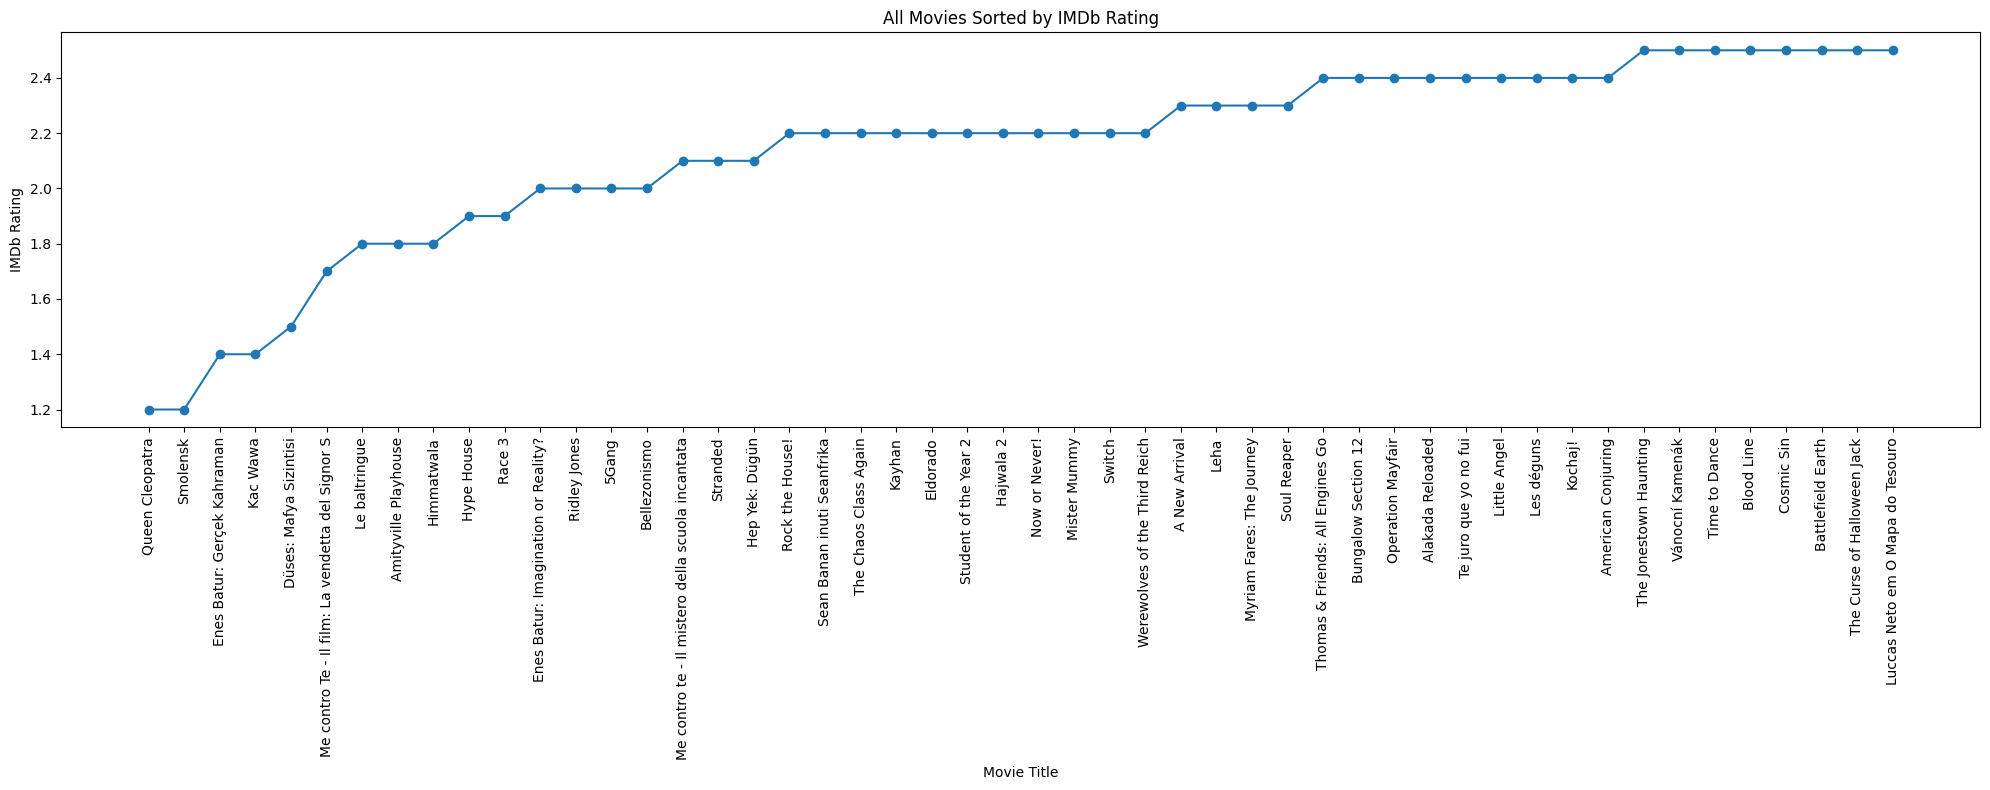

In [19]:
df = df.dropna(subset=['imdbAverageRating'])
df_sorted = df.sort_values('imdbAverageRating', ascending=True).head(50)
plt.figure(figsize=(20,8))
plt.plot(df_sorted['title'], df_sorted['imdbAverageRating'], marker='o')
plt.xticks(rotation=90)
plt.title('All Movies Sorted by IMDb Rating')
plt.ylabel('IMDb Rating')
plt.xlabel('Movie Title')
plt.tight_layout()
plt.show()




In [4]:
genres_ratings = []
for index, row in df.iterrows():
    if pd.notna(row['genres']) and pd.notna(row['imdbAverageRating']):
       
        genres_list = row['genres'].split(', ')
        for genre in genres_list:
            genres_ratings.append((genre.strip(), row['imdbAverageRating']))
genres_ratings_df = pd.DataFrame(genres_ratings, columns=['Genre', 'Rating'])
top_genre_ratings = genres_ratings_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

(top_genre_ratings)




Genre
Action & Adventure    7.200000
Documentary           6.937160
Biography             6.933402
History               6.920680
Talk-Show             6.825000
Animation             6.798769
Sport                 6.730248
War                   6.716544
News                  6.711111
Music                 6.643911
Name: Rating, dtype: float64

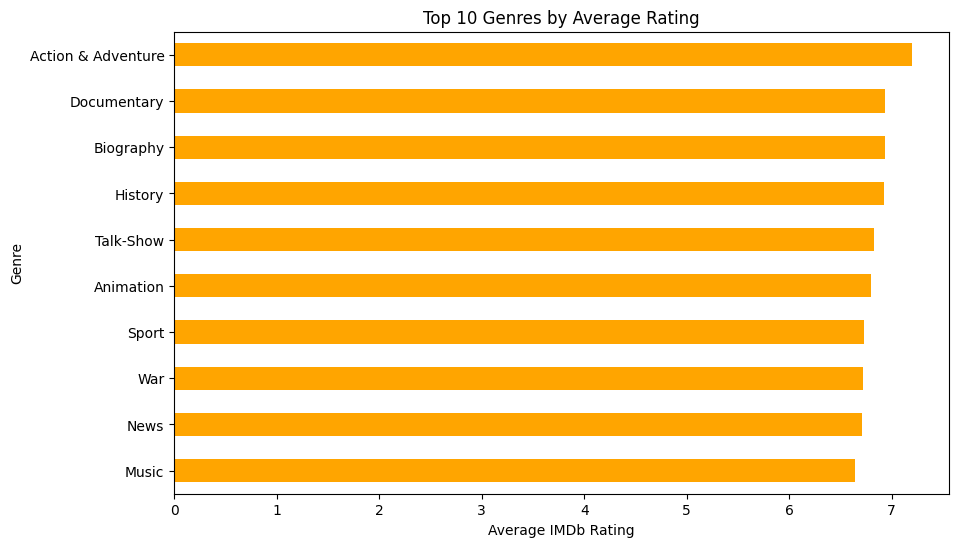

In [5]:

top_genre_ratings.plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average IMDb Rating')
plt.title('Top 10 Genres by Average Rating')
plt.gca().invert_yaxis() 
plt.show()


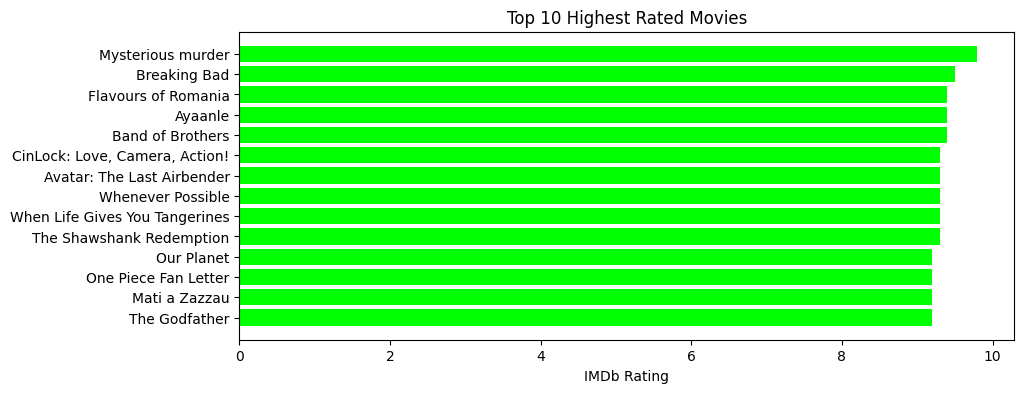

In [6]:
df = df.dropna(subset=['imdbAverageRating'])
top_rated = df.sort_values(by='imdbAverageRating', ascending=False).head(15)
plt.figure(figsize=(10,4))
plt.barh( top_rated['title'], top_rated['imdbAverageRating'],color='lime')
plt.xlabel('IMDb Rating')
plt.title('Top 10 Highest Rated Movies')
plt.gca().invert_yaxis()
plt.show()

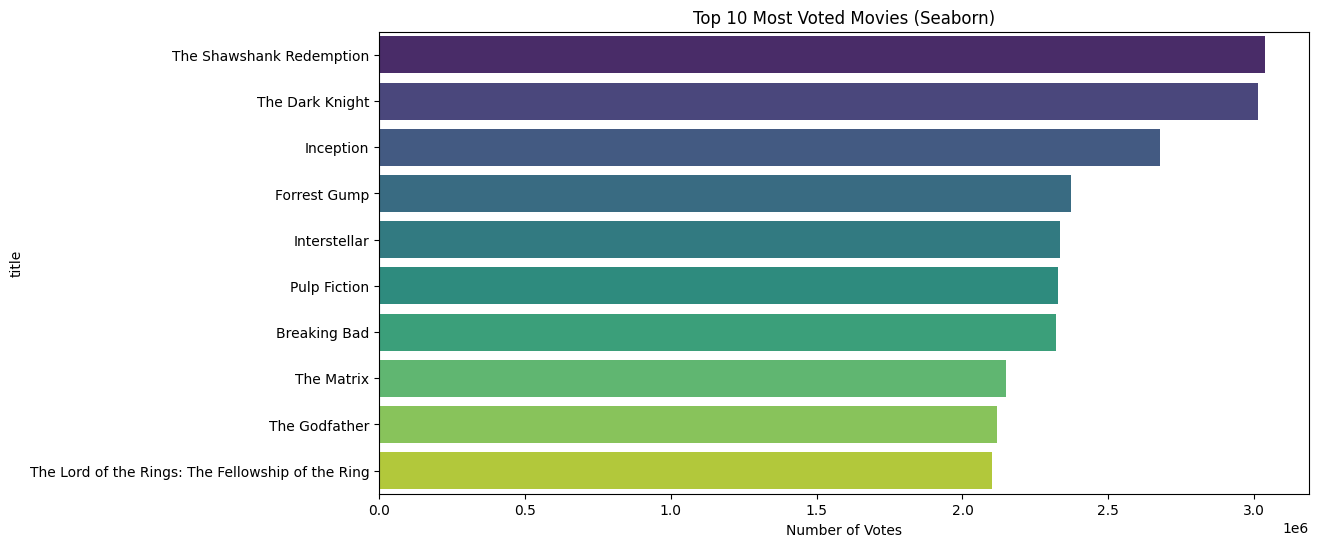

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(
    x='imdbNumVotes',
    y='title',
     hue='title',
    data=most_voted,
    palette='viridis'
)
plt.xlabel('Number of Votes')
plt.title('Top 10 Most Voted Movies (Seaborn)')
plt.show()


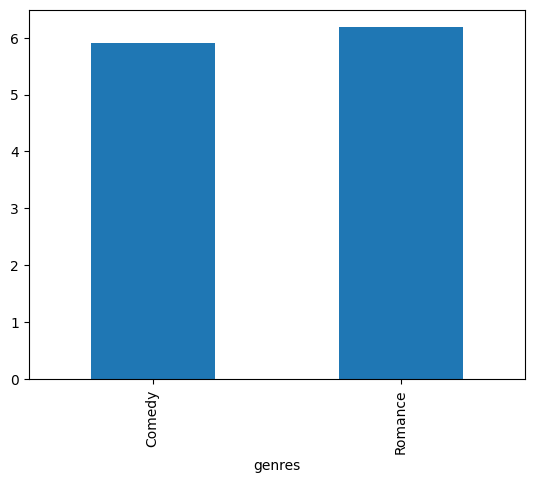

In [8]:
filtered = df[df['genres'].str.contains('Romance|Comedy', na=False)]
data = filtered.explode('genres')
data = data[data['genres'].isin(['Romance', 'Comedy'])]
avg_ratings = data.groupby('genres')['imdbAverageRating'].mean()
avg_ratings.plot(kind='bar')
plt.show()


In [12]:
from collections import Counter
genre_counter = Counter()
for genres in df['genres'].dropna():
    genre_list = genres.split(', ')
    genre_counter.update(genre_list)
top_genres = pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])

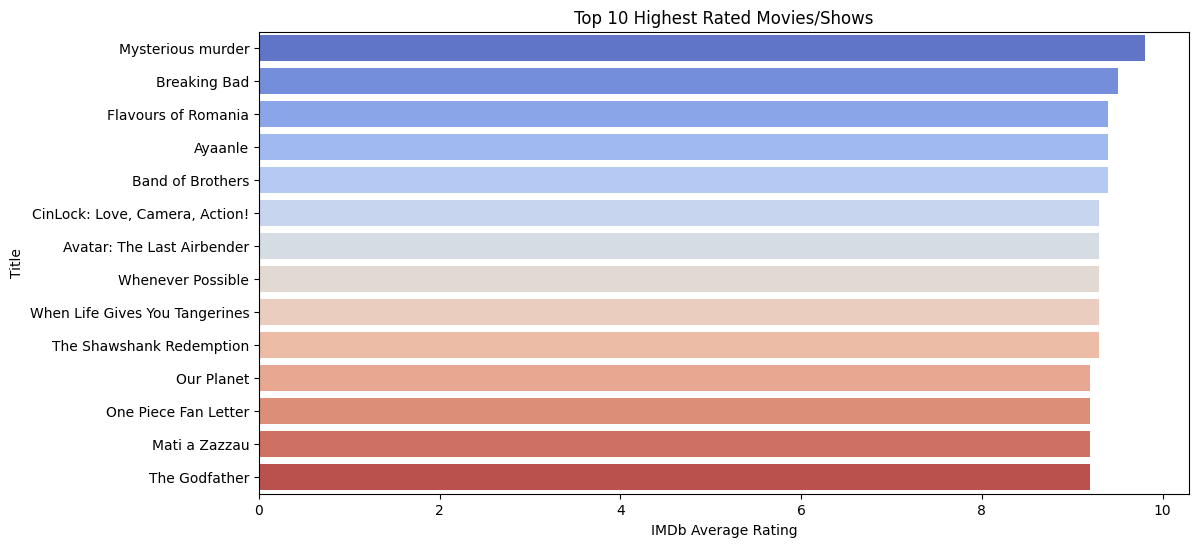

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x='imdbAverageRating', y='title',  data=top_rated,  hue='title',  palette='coolwarm',legend=False   )
plt.title('Top 10 Highest Rated Movies/Shows')
plt.xlabel('IMDb Average Rating')
plt.ylabel('Title')
plt.show()


<Axes: xlabel='releaseYear'>

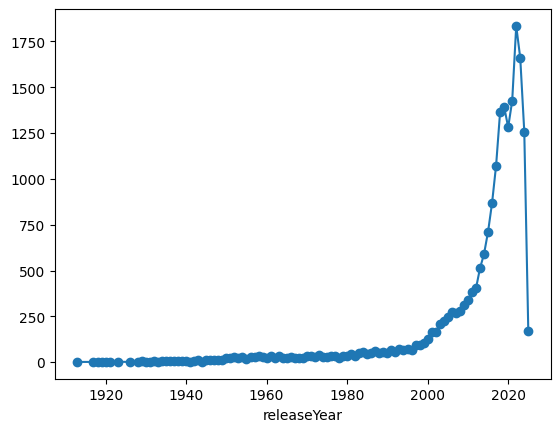

In [11]:
yearly_releases = df['releaseYear'].value_counts().sort_index()
yearly_releases.plot(kind='line', marker='o')
